In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


## Performing ANN on MNIST dataset

In [2]:
#load mnist dataset
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
#shape
print(x_train.shape)
print(y_train.shape)


(60000, 28, 28)
(60000,)


In [3]:
#standardize
x_train = x_train/255
x_test = x_test/255

#flatten
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2])
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2])

In [4]:
#to categorical
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [5]:
#shape
x_train.shape

(60000, 784)

## Building a Sequential ANN model with Dense Layers

In [6]:
model=Sequential()
model.add(Dense(256,input_shape=(784,),activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

C:\Users\kalli\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 242,762 (948.29 KB)

 Trainable params: 242,762 (948.29 KB)

 Non-trainable params: 0 (0.00 B)

## Fitting the model for epochs=10 and batch size=32

In [8]:
history=model.fit(x_train, y_train, epochs=10, batch_size=32,validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8737 - loss: 0.4258 - val_accuracy: 0.9649 - val_loss: 0.1213
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9701 - loss: 0.0987 - val_accuracy: 0.9647 - val_loss: 0.1108
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9790 - loss: 0.0657 - val_accuracy: 0.9690 - val_loss: 0.1056
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9842 - loss: 0.0479 - val_accuracy: 0.9723 - val_loss: 0.0941
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9882 - loss: 0.0358 - val_accuracy: 0.9714 - val_loss: 0.1089
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9897 - loss: 0.0321 - val_accuracy: 0.9744 - val_loss: 0.0968
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.9911 - loss: 0.0259 - val_accuracy: 0.9756 - val_loss: 0.0982
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9934 - loss: 0.0202 

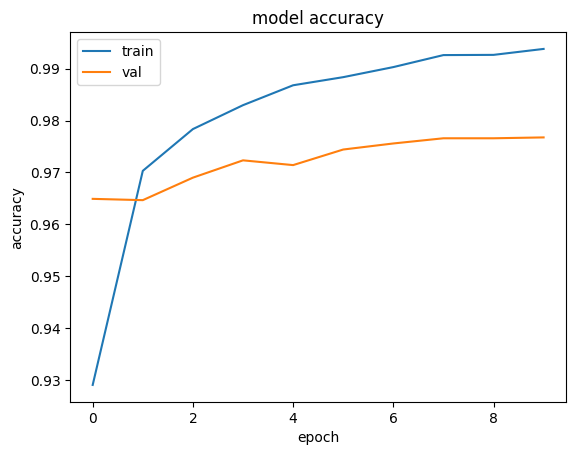

In [10]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


In [11]:
#test data accuracy
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9753 - loss: 0.1103
Test accuracy: 0.977400004863739


In [48]:
#predict to see the values
model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[1.3693033e-11, 1.3398323e-08, 1.2207039e-08, ..., 9.9999940e-01,
        1.2540928e-09, 5.6751821e-07],
       [9.7365116e-15, 5.4706066e-13, 1.0000000e+00, ..., 5.7408314e-16,
        6.3354812e-13, 3.5759805e-21],
       [4.7241036e-07, 9.9994886e-01, 3.1785332e-06, ..., 9.8321270e-06,
        1.8886352e-05, 1.1846299e-07],
       ...,
       [5.7232330e-10, 3.9754970e-11, 1.6902242e-09, ..., 1.6873858e-10,
        8.4173662e-10, 9.8822811e-06],
       [3.2738211e-17, 4.7628294e-20, 3.7580155e-22, ..., 7.3676053e-16,
        2.4884626e-11, 1.0433248e-14],
       [8.0171616e-12, 4.6696836e-16, 1.6732768e-11, ..., 5.6474009e-19,
        3.2842160e-09, 1.9373597e-14]], dtype=float32)

In [49]:
y_test.shape

(10000, 10)